# Calculate the observed amplitudes with data.

Define constants

In [5]:
from math import sqrt, radians, atan2, atan, tan, degrees
from IPython.display import Latex
import numpy as np
font_size=14
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os, sys
sys.path.append('../CommonUtils/')
import CommonUtils as cu

In [6]:
A_bz=   np.array([-17.6, 20.3])
A_bz_e= np.array([5.5 , 5.6])
A_bz_mean= np.mean(A_bz)
A_bz_mean_e = 1.0/np.sqrt(np.sum(1.0/A_bz_e**2))
ds_names=('1999', "2000")
ds_colors=["k", "k"]
ds_markers=["o", "o"]

print("Mean B_z=", A_bz_mean, "+-", A_bz_mean_e)

Mean B_z= 1.3499999999999996 +- 3.9239648833518226


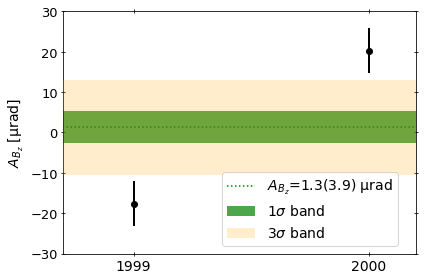

In [7]:
fig, ax = cu.plot_fom(ds_names, A_bz, A_bz_e, ds_colors, ds_markers, y_label=r"$A_{B_z} \ [\rm{\mu}$rad]", no_legend=True, BNL=True)
ax.set_xlim(0.7, 2.2)
ax.set_ylim(-30, 30)
ax.plot([0,5],[A_bz_mean, A_bz_mean], ls=":", c="g", zorder=1, label=r"$A_{B_z}$="+str(round(A_bz_mean,1))+"("+str(round(A_bz_mean_e,1))+r") $\rm{\mu}$rad")
# ax.plot([0,5],[br_mean+br_mean_e, br_mean+br_mean_e], ls="--", c="orange")
# ax.plot([0,5],[br_mean-br_mean_e, br_mean-br_mean_e], ls="--", c="orange")
ax.set_xlabel("")
plt.xticks(fontsize=14)

ax.add_patch(patches.Rectangle(
        xy=(0, A_bz_mean-A_bz_mean_e),  # point of origin.
        width=5,
        height=A_bz_mean_e*2,
        linewidth=0,
        color='green',
        fill=True,
        alpha=0.7,
        zorder=2,
         label=r"$1\sigma$ band"
    )
)
band_width=3
ax.add_patch(patches.Rectangle(
        xy=(0, A_bz_mean-(A_bz_mean_e*band_width)),  # point of origin.
        width=5,
        height=A_bz_mean_e*band_width*2,
        linewidth=0,
        color='orange',
        fill=True,
        alpha=0.2,
        zorder=3,
        label=str(band_width)+r"$\sigma$ band"
    )
)

plt.legend(fontsize=14, loc=(0.45,0.03))
plt.tight_layout()
fig.savefig("../fig/sum_A_bz_BNL.png", dpi=300, bbox_inches='tight');

In [8]:
a_edm = 0.089
print("Using asymmetry factor of", a_edm)

Using asymmetry factor of 0.089


$$ \delta ' = \tan\left(\frac{B_z}{B_y}\right)  \approx \frac{B_z}{B_y}$$

In [11]:
A_bz_mean = 1.3
A_bz_mean_e = 3.9
print("For A_bz of", A_bz_mean, "+-",A_bz_mean_e ,"urad")

delta_lab = A_bz_mean / a_edm
delta_lab_e = A_bz_mean_e / a_edm

print("Tilt angle in the lab frame", delta_lab, "+-" ,delta_lab_e, "urad or ppm")
print("Tilt angle in the lab frame", round(delta_lab,1), "+-" , round(delta_lab_e,1), "urad or ppm")
print("Tilt angle in the lab frame", round(delta_lab,0), "+-" , round(delta_lab_e,0), "urad or ppm")
print("Using asymmetry factor of", a_edm)

For A_bz of 1.3 +- 3.9 urad
Tilt angle in the lab frame 14.606741573033709 +- 43.82022471910113 urad or ppm
Tilt angle in the lab frame 14.6 +- 43.8 urad or ppm
Tilt angle in the lab frame 15.0 +- 44.0 urad or ppm
Using asymmetry factor of 0.089


$$ \frac{\Delta \omega_a}{\omega_a} = \frac{1}{2}\left(\frac{(1+a_{\mu})}{a_{\mu}\gamma}\frac{B_z}{B_y}\right)^2 $$

In [12]:
aMuon= 11659208.9e-10  
betaGammaMagicSquared = (1.0 / aMuon)
gammaMagicSquared = (1.0 + betaGammaMagicSquared)
gammaMagic=sqrt(gammaMagicSquared)
print("ɣ"+"={0:.5f}".format(gammaMagic))

ɣ=29.30343


In [13]:
def func_omega(delta):
    delta = delta*1e-6 # input in ppm
    corr = 0.5 * ( ( (1+aMuon)/(aMuon*gammaMagic) ) * delta )**2
    return corr*1e+6 # output in ppm

In [15]:
delta_omega = func_omega(delta_lab)
delta_omega_e = func_omega(delta_lab_e)

print("For tilt of", delta_lab, "ppm")

print("Omega_a uncertainty", delta_omega, "+-" ,delta_omega_e, "ppm")
print("Omega_a uncertainty", delta_omega*1e3, "+-" ,delta_omega_e*1e3, "ppb")
print("Omega_a uncertainty", round(delta_omega,1), "+-" , round(delta_omega_e,1), "ppm")

#calculate the asymmetric errors 
delta_omega_e_P = func_omega( (delta_lab+delta_lab_e) )
delta_omega_e_M = func_omega( (delta_lab-delta_lab_e) )

print("Omega_a uncertainty", round(delta_omega,2), "+" , round(delta_omega_e_P-delta_omega,2),"-",round(delta_omega-delta_omega_e_M,2),  "ppm")
print("Omega_a uncertainty", round(delta_omega*1e3,1), "+" , round( (delta_omega_e_P-delta_omega)*1e3,1), "-",round( (delta_omega-delta_omega_e_M)*1e3,1),  "ppb")


For tilt of 14.606741573033709 ppm
Omega_a uncertainty 0.091603837995992 +- 0.824434541963928 ppm
Omega_a uncertainty 91.60383799599201 +- 824.4345419639279 ppb
Omega_a uncertainty 0.1 +- 0.8 ppm
Omega_a uncertainty 0.09 + 1.37 - -0.27 ppm
Omega_a uncertainty 91.6 + 1374.1 - -274.8 ppb


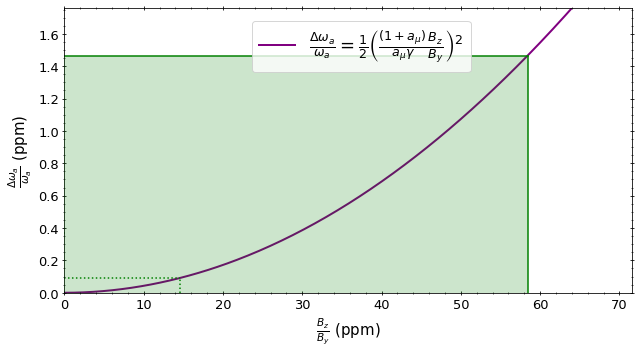

In [16]:
delta_test = np.linspace(0, delta_lab+delta_lab_e*1.5, 400)
fig, ax = cu.plot(delta_test, func_omega(delta_test), figsize=(9,5), plot=True, lw=2, ls="-", c="purple", label=r"$ \frac{\Delta \omega_a}{\omega_a} = \frac{1}{2}\left(\frac{(1+a_{\mu})}{a_{\mu}\gamma}\frac{B_z}{B_y}\right)^2$")
ax.set_xlabel(r"$\frac{B_z}{B_y}$ (ppm)", fontsize=15)
ax.set_ylabel(r"$\frac{\Delta \omega_a}{\omega_a}$ (ppm)", fontsize=15)
ax.set_xlim(0, delta_lab+delta_lab_e*1.3)
ax.set_ylim(0, delta_omega_e_P*1.2)

ax.plot([delta_lab,delta_lab],[0, delta_omega], ls=":", c="g", zorder=1)
ax.plot([delta_lab-delta_lab_e,delta_lab-delta_lab_e],[0, delta_omega_e_M], ls="-", c="g", zorder=1)
ax.plot([delta_lab+delta_lab_e,delta_lab+delta_lab_e],[0, delta_omega_e_P], ls="-", c="g", zorder=1)

ax.plot([0,delta_lab],[delta_omega, delta_omega], ls=":", c="g", zorder=1)
ax.plot([0,delta_lab+delta_lab_e],[delta_omega_e_P, delta_omega_e_P], ls="-", c="g", zorder=1)
ax.plot([0,delta_lab-delta_lab_e],[delta_omega_e_M, delta_omega_e_M], ls="-", c="g", zorder=1)

ax.add_patch(patches.Rectangle(
        xy=(0, delta_omega_e_M),  # point of origin.
        width=delta_lab+delta_lab_e,
        height=delta_omega_e_P-delta_omega_e_M,
        linewidth=0,
        color='green',
        fill=True,
        alpha=0.2,
        zorder=3
    )
)

ax.add_patch(patches.Rectangle(
        xy=(delta_lab-delta_lab_e, 0),  # point of origin.
        width=delta_lab_e*2,
        height=delta_omega_e_M,
        linewidth=0,
        color='green',
        fill=True,
        alpha=0.2,
        zorder=3
    )
)

ax.legend(fontsize=18, loc=(0.33, 0.775))
fig.tight_layout()
plt.savefig("../fig/bz_money.png", dpi=200)